In [1]:
## Importing Libraries
import warnings
warnings.filterwarnings('ignore') #remove warnings


import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import neighbors, datasets

iris = datasets.load_iris() #Loading iris dataset
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
# Create a DataFrame from the iris dataset to visualize
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

In [6]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## EDA

<AxesSubplot:>

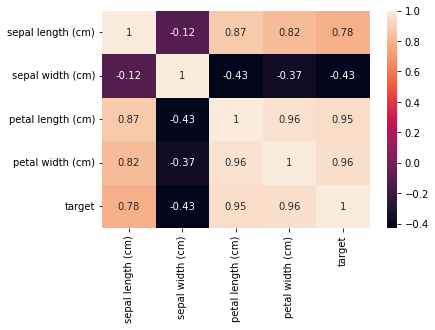

In [9]:
sns.heatmap(data.corr(),annot=True)

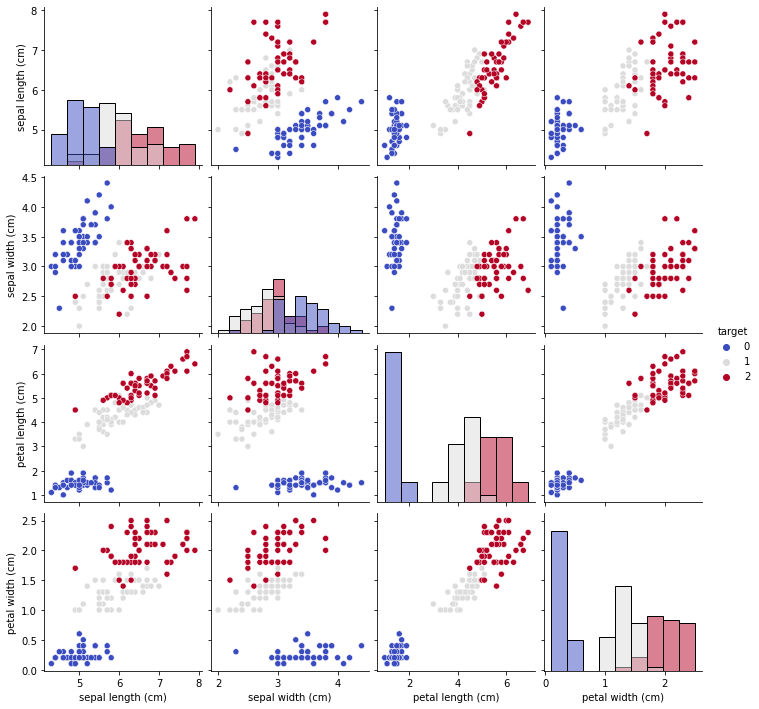

In [10]:
# Pairwise scatter plot to visualize relationships between features
sns.pairplot(data=data, hue='target', diag_kind='hist',palette='coolwarm')
plt.show()

<AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>

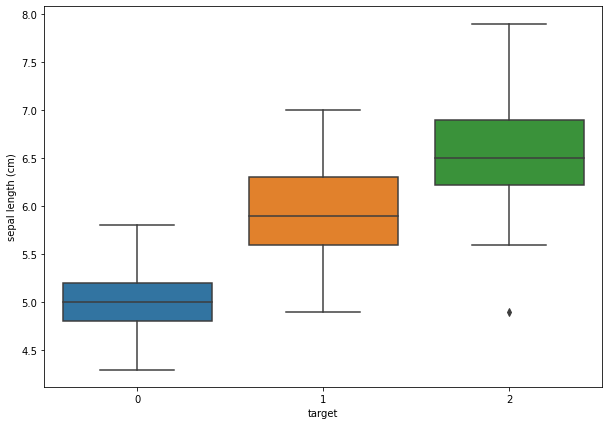

In [11]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='sepal length (cm)', data=data)

Sepal Length of 'setosa', 'versicolor', 'virginica' are in order from low to high.

<AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>

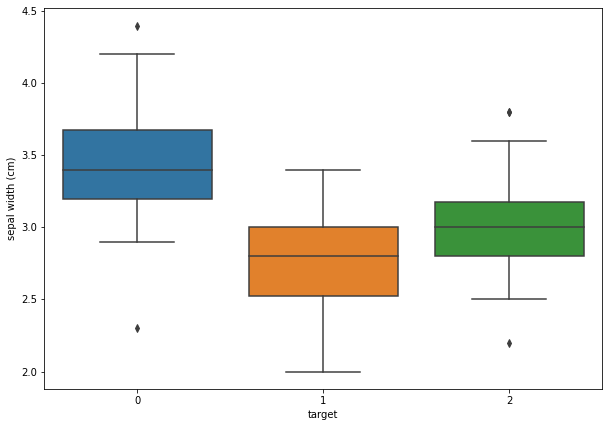

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='sepal width (cm)', data=data)

Average Sepal widht of 'setosa', 'versicolor', 'virginica' are near to each other.

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

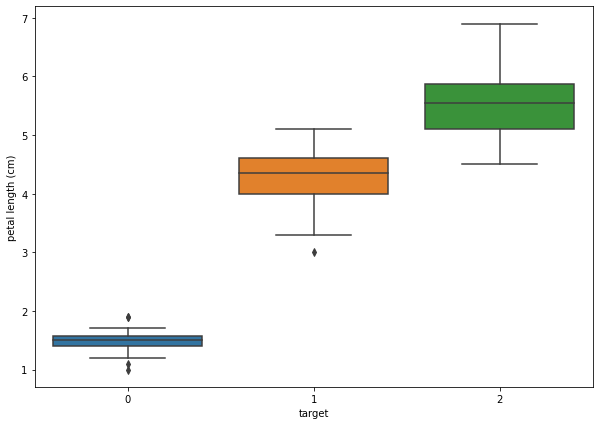

In [13]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='petal length (cm)', data=data)

Petal Length of 'setosa', 'versicolor', 'virginica' are in order from low to high.

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

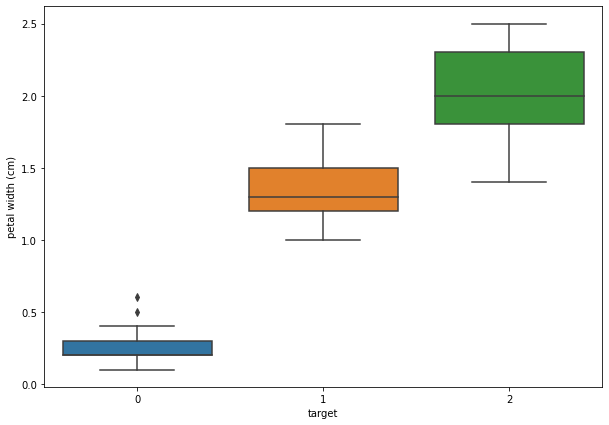

In [14]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='target', y='petal width (cm)', data=data)

Petal width of 'setosa', 'versicolor', 'virginica' are in order from low to high.

## Decision Tree Training and Testing

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy',random_state=42)
# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42, splitter='random')

In [29]:
from sklearn.metrics import accuracy_score
# Predict labels on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_pred)

0.9210526315789473

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[12,  1,  0],
       [ 0, 10,  0],
       [ 0,  2, 13]], dtype=int64)